In [126]:
import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import *
from sklearn import metrics
from sklearn.metrics import *



In [127]:
# Incarcare dataset, prezentare coloane, primele linii din dataset

In [128]:
input_file = "drug200.csv"


# comma delimited is the default
#read_csv method - Read a comma-separated values (csv) file into DataFrame.
data = pd.read_csv(input_file, header = 0)

In [129]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [130]:
data.shape
#dimensiunea datelor

(200, 6)

In [131]:
data.columns
#coloanele

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [132]:
data.head()
#returns top n rows of a DataFrame or Series where n is a user input value

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [133]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [134]:
# Computing Info Gain

In [135]:
data['Sex']

0      F
1      M
2      M
3      F
4      F
      ..
195    F
196    M
197    M
198    M
199    F
Name: Sex, Length: 200, dtype: object

In [136]:
#Cate peroane sunt de sex feminin respectiv masculin
data.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [137]:
#Cum este impartit blood pressure-ul in dataset
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [138]:
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [139]:
# Ploturi cu distributia datelor in dataset

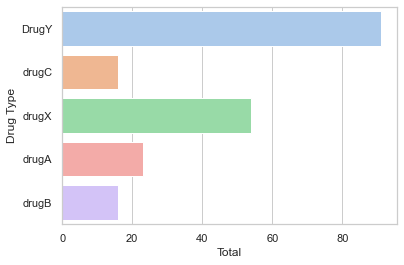

In [140]:
# Tipul de medicament folosit
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.countplot(y="Drug", data=data, palette="pastel")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

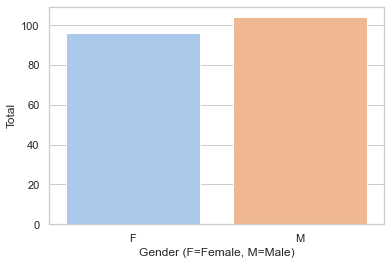

In [141]:
# Sexul distribuit in dataset
sns.set_theme(style="whitegrid")
sns.countplot(x="Sex", data=data, palette="pastel")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

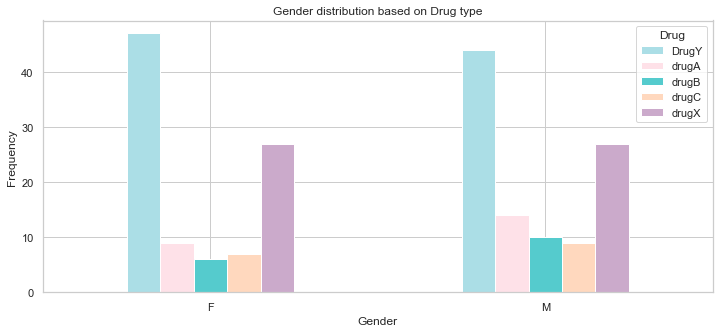

In [142]:
# Distributia sexului in functie de edicamentul administrat

pd.crosstab(data.Sex,data.Drug).plot(kind="bar",figsize=(12,5),color=['#ABDEE6','#FEE1E8','#55CBCD','#FFD8BE','#CBAACB'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

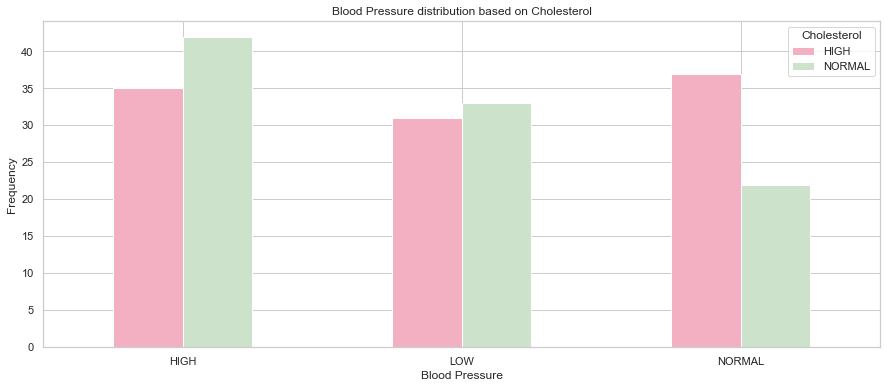

In [143]:
# Tensiunea in functie de nivelul de colesterol
pd.crosstab(data.BP,data.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#F3B0C3','#CCE2CB'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

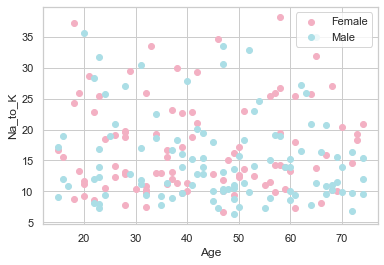

In [144]:
# Distributia sodiului si a potasiului in functie de sex 
plt.scatter(x=data.Age[data.Sex=='F'], y=data.Na_to_K[(data.Sex=='F')], c="#F3B0C3")
plt.scatter(x=data.Age[data.Sex=='M'], y=data.Na_to_K[(data.Sex=='M')], c="#ABDEE6")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

In [145]:
# PREPROCESARE


In [146]:
#ONE HOT ENCODER

In [147]:
df_1=pd.get_dummies(data=data,columns=["BP","Cholesterol",'Sex'],drop_first=True)

In [148]:
df_1.head()

,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,0,0,1
2,47,10.114,drugC,1,0,0,1
3,28,7.798,drugX,0,1,0,0
4,61,18.043,DrugY,1,0,0,0


In [149]:
from sklearn.preprocessing import LabelEncoder
c1='Drug'
label_encoder = LabelEncoder() 
df_1[c1]= label_encoder.fit_transform(df_1[c1]) 
df_1[c1].unique()
df_1

,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
0,23,25.355,0,0,0,0,0
1,47,13.093,3,1,0,0,1
2,47,10.114,3,1,0,0,1
3,28,7.798,4,0,1,0,0
4,61,18.043,0,1,0,0,0
...,...,...,...,...,...,...,...
195,56,11.567,3,1,0,0,0
196,16,12.006,3,1,0,0,1
197,52,9.894,4,0,1,0,1
198,23,14.020,4,0,1,1,1


In [150]:
# Split data into training and test

X = df_1.drop(['Drug','Age'],axis = 1)
Y = df_1['Drug']

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [152]:
X_train.shape

(134, 5)

In [153]:
Y_train.shape

(134,)

In [154]:
X_test.shape

(66, 5)

In [155]:
Y_test.shape

(66,)

In [156]:
#aplicare algoritm DecisionTree pe dataset cu criteriul entropy

In [157]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion="entropy")
dt


DecisionTreeClassifier(criterion='entropy')

In [158]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn

KNeighborsClassifier(n_neighbors=15)

Algorithm:  DecisionTreeClassifier(criterion='entropy')
Accuracy =  0.9393939393939394
Confusion matrix is :  [[29  0  0  0  0]
 [ 0  6  2  0  0]
 [ 0  2  2  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 19]]
F1_score is :  0.85
Recall score is :  [1.   0.75 0.5  1.   1.  ]
Precision score is :  [1.   0.75 0.5  1.   1.  ]
Algorithm:  KNeighborsClassifier(n_neighbors=15)
Accuracy =  0.803030303030303
Confusion matrix is :  [[29  0  0  0  0]
 [ 0  5  1  0  2]
 [ 0  3  0  0  1]
 [ 0  0  1  2  3]
 [ 0  2  0  0 17]]
F1_score is :  0.573015873015873
Recall score is :  [1.         0.625      0.         0.33333333 0.89473684]
Precision score is :  [1.         0.5        0.         1.         0.73913043]
Algorithm:  VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('knn', KNeighborsClassifier(n_neighbors=15))],
                 voting='soft')
Accuracy =  0.8939393939393939
Confusion matrix is :  [[29  0  0  0  0

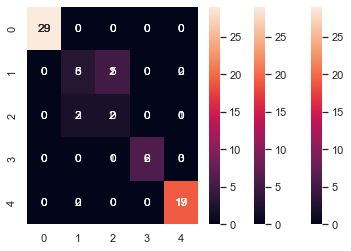

In [159]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[("dt",dt),("knn",knn)] , voting='soft')

for i in (dt, knn, voting):
    i.fit(X_train, Y_train)
    y_pred = i.predict(X_test)
    print("Algorithm: ", i)
    print("Accuracy = ",accuracy_score(Y_test, y_pred))
    print("Confusion matrix is : ", confusion_matrix(Y_test, y_pred))
    print("F1_score is : ", f1_score(Y_test, y_pred, average='macro'))
    print("Recall score is : ",  recall_score(Y_test, y_pred,average=None))
    print("Precision score is : ", precision_score(Y_test, y_pred, average=None))
    sns.heatmap(confusion_matrix(Y_test, y_pred),annot=True)
    

Algorithm:  DecisionTreeClassifier(criterion='entropy')
Accuracy =  0.8939393939393939
Confusion matrix is :  [[29  0  0  0  0]
 [ 0  3  5  0  0]
 [ 0  2  2  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 19]]
F1_score is :  0.765034965034965
Recall score is :  [1.    0.375 0.5   1.    1.   ]
Precision score is :  [1.         0.6        0.28571429 1.         1.        ]
Algorithm:  KNeighborsClassifier(n_neighbors=15)
Accuracy =  0.803030303030303
Confusion matrix is :  [[29  0  0  0  0]
 [ 0  5  1  0  2]
 [ 0  3  0  0  1]
 [ 0  0  1  2  3]
 [ 0  2  0  0 17]]
F1_score is :  0.573015873015873
Recall score is :  [1.         0.625      0.         0.33333333 0.89473684]
Precision score is :  [1.         0.5        0.         1.         0.73913043]
Algorithm:  VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('knn', KNeighborsClassifier(n_neighbors=15))])
Accuracy =  0.8484848484848485
Confusion matrix is :  

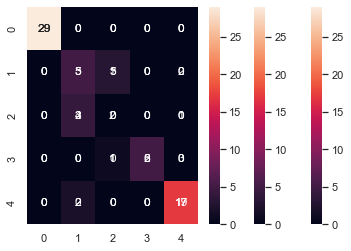

In [160]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[("dt",dt),("knn",knn)] , voting='hard')

for i in (dt, knn, voting):
    i.fit(X_train, Y_train)
    y_pred = i.predict(X_test)
    print("Algorithm: ", i)
    print("Accuracy = ",accuracy_score(Y_test, y_pred))
    print("Confusion matrix is : ", confusion_matrix(Y_test, y_pred))
    print("F1_score is : ", f1_score(Y_test, y_pred, average='macro'))
    print("Recall score is : ",  recall_score(Y_test, y_pred,average=None))
    print("Precision score is : ", precision_score(Y_test, y_pred, average=None))
    sns.heatmap(confusion_matrix(Y_test, y_pred),annot=True)
    